In [ ]:
!pip install deap
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Dataset:** https://archive.ics.uci.edu/ml/datasets/incomes

**Algorithm:** ........

In [ ]:
import numpy as np
from pandas import read_csv

# List of all the column names since there was none in the data
columns = ['Age','Workclass','Id','Education','Education Num','Marital Status',
       'Occupation','Relationship','Race','Sex','Capital Gain','Capital Loss',
       'Hours/Week','Country','Salary']


url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'


data = read_csv(url,header=None,names=columns)
data.drop('Id',axis=1, inplace=True)
print(data.shape)

(32561, 14)


In [ ]:
# print(data["stalk-root"].unique())
# data = data.replace('?', np.nan)

In [ ]:
X = data.iloc[:, 0:13]
y = data.iloc[:, 13:14]

X

,Age,Workclass,Education,Education Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Country
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


In [ ]:
y

,Salary
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
...,...
32556,<=50K
32557,>50K
32558,<=50K
32559,<=50K


In [ ]:
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder

encoder = ce.OrdinalEncoder()
X = encoder.fit_transform(X)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)

In [ ]:
hparams = {
'n_estimators': [10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0],
'learning_rate': np.logspace(-2, 0, num=10, base=10),
'algorithm': ['SAMME', 'SAMME.R'],
}

In [ ]:
from deap import base
from deap import creator
from deap import tools
import random

# define a single objective, maximizing fitness strategy:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
# create the Individual class based on list:
creator.create("Individual", list, fitness=creator.FitnessMax)


In [ ]:
toolbox = base.Toolbox()
# fill in the with random floats for each type of hyper parameter
toolbox.register("h1", random.uniform,1,100)
toolbox.register("h2", random.uniform,0.01,1.0)
toolbox.register("h3", random.uniform,0,1)

toolbox.register("IndividualCreator",tools.initCycle,creator.Individual,
                 (toolbox.h1,toolbox.h2,toolbox.h3),n=1)

In [ ]:
# Test IndividualCreator
for i in range(10):
    print(toolbox.IndividualCreator())

[83.08745219620812, 0.36821573445813577, 0.46814851494959486]
[63.129807823574005, 0.1640533734088262, 0.7771453719665768]
[96.44241895111297, 0.8693799458718726, 0.12148663933786663]
[39.76191050313941, 0.4030537448431171, 0.20941835799218977]
[51.67366973320606, 0.8629091543215373, 0.7996502396990289]
[87.33418419263216, 0.7147573770262075, 0.4106932525100432]
[76.41107302747172, 0.9446782868718364, 0.21925530137063942]
[55.67914411113631, 0.3045521000989395, 0.30002824185429766]
[16.858942075115422, 0.3951525959457436, 0.40969398293637616]
[24.016863178417935, 0.9830652488074823, 0.11449831703181301]


In [ ]:
def getParams(individual):
    n_est = round(individual[0])
    lrate = individual[1]
    algo = ['SAMME', 'SAMME.R'][round(individual[2])] 
    return n_est, lrate, algo

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

def getAccuracy(individual):
    n_estimators, learning_rate, algorithm = getParams(individual)
    classifier = GradientBoostingClassifier(random_state=42,
                                         n_estimators=n_estimators,
                                         learning_rate=0.1,
                                         max_depth=1,
                                         )

    cv_results = model_selection.cross_val_score(classifier,
                                                 X_train,
                                                 y_train,
                                                 cv=kfold,
                                                 scoring='accuracy')
    return cv_results.mean()

In [ ]:
# create the population operator to generate a list of individuals:
toolbox.register("populationCreator", tools.initRepeat, list, 
                 toolbox.IndividualCreator)
# fitness calculation
def classificationAccuracy(individual):
    return getAccuracy(individual),

toolbox.register("evaluate", classificationAccuracy)

In [ ]:
# genetic operators:
from deap import gp
# YOUR TASK fill in your own operators

toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutPolynomialBounded, eta=1.0, low=[1, 0.01, 0], up=[100, 1.0, 1], indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

In [ ]:
individual = [1.3177909433075996, 0.09159345360220497, 0.16128206481329388]
toolbox.mutate(individual)

([76.2048343952071, 0.09159345360220497, 0.16128206481329388],)

In [ ]:
from deap import algorithms

# Genetic Algorithm constants:
POPULATION_SIZE = 20
P_CROSSOVER = 0.9  # probability for crossover
P_MUTATION = 0.6   # probability for mutating an individual
MAX_GENERATIONS = 10
HALL_OF_FAME_SIZE = 10

# create initial population (generation 0):
population = toolbox.populationCreator(n=POPULATION_SIZE)
#print(population)
# prepare the statistics object:
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("max", np.max)
stats.register("avg", np.mean)

# define the hall-of-fame object:
hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

# perform the Genetic Algorithm flow with hof feature added:
population, logbook = algorithms.eaSimple(population,
                                          toolbox,
                                          cxpb=P_CROSSOVER,
                                          mutpb=P_MUTATION,
                                          ngen=MAX_GENERATIONS,
                                          stats=stats,
                                          halloffame=hof,
                                          verbose=True)

# print best solution found:
print("- Best solution is: ")
print("params = ", hof.items[0])
print("Accuracy = %1.5f" % hof.items[0].fitness.values[0])

gen	nevals	max     	avg     
0  	20    	0.849278	0.817598
1  	20    	0.849278	0.834108
2  	20    	0.849278	0.844256
3  	20    	0.849278	0.848318
4  	20    	0.849969	0.847806
5  	20    	0.850084	0.849524
6  	20    	0.850084	0.8496  
7  	20    	0.850084	0.848829
8  	19    	0.850084	0.849312
9  	19    	0.850084	0.850025
10 	20    	0.850084	0.848489
- Best solution is: 
params =  [97.54944407755704, 0.9785068207175278, 0.7716330563052614]
Accuracy = 0.85008


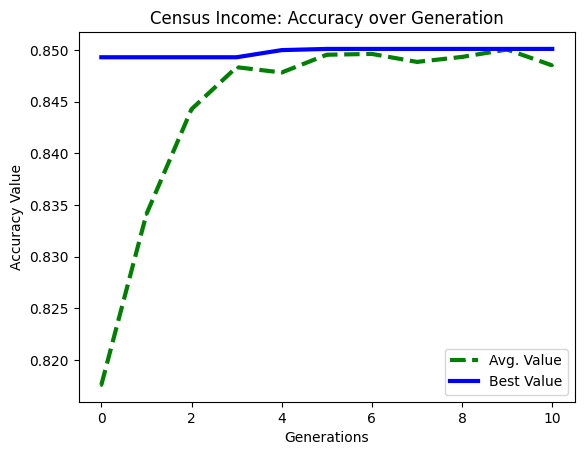

In [ ]:
import matplotlib.pyplot as plt

np_max = np.zeros(len(logbook), dtype=float)
np_avg = np.zeros(len(logbook), dtype=float)
np_gen = np.arange(len(logbook))

for i in range(0, len(logbook)):
  np_max[i] = float(logbook[i]['max'])
  np_avg[i] = float(logbook[i]['avg'])


plt.plot(np_gen, np_avg, color='green', linestyle='dashed', linewidth=3,marker='o', markerfacecolor='blue', markersize=1, label='Avg. Value')
plt.plot(np_gen, np_max, color='blue', linestyle='solid', linewidth=3,marker='o', markerfacecolor='blue', markersize=1, label='Best Value')
plt.xlabel('Generations')
plt.ylabel('Accuracy Value')
plt.title('Census Income: Accuracy over Generation')
plt.legend(loc='lower right')
plt.show()

#Default Parameters

In [ ]:
classifier_org = GradientBoostingClassifier(random_state=21)

cv_results_org = model_selection.cross_val_score(classifier_org,
                                                 X_train,
                                                 y_train,
                                                 cv=kfold,
                                                 scoring='accuracy')
print('[GradientBoosting] mean: ', cv_results_org.mean())

[GradientBoosting] mean:  0.8629068522957446


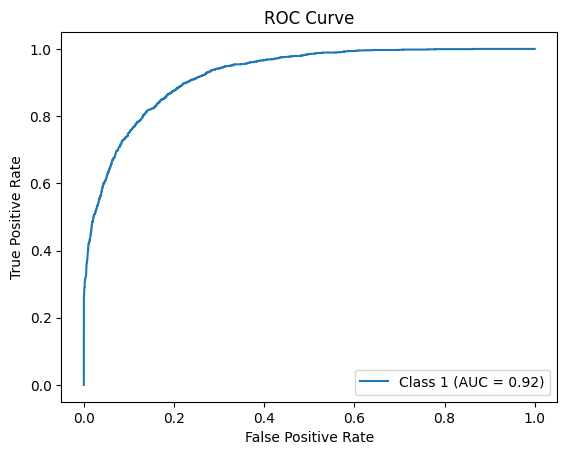

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import auc

n_classes = len(np.unique(y_train))

# Fit the model to the training data
classifier_org.fit(X_train, y_train)

# Predict probabilities for each class
######
y_scores1 = classifier_org.predict_proba(X_test)[:, 1]

# Compute the FPR, TPR, and AUC
fpr, tpr, _ = roc_curve(y_test, y_scores1)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='Class 1 (AUC = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Tune Parameters

In [ ]:
classifier_tune = GradientBoostingClassifier(random_state=21,
                                         loss = 'exponential',
                                         n_estimators=300,
                                         learning_rate=0.1,
                                         max_depth=8,
                                         )

cv_results_org = model_selection.cross_val_score(classifier_tune,
                                                 X_train,
                                                 y_train,
                                                 cv=kfold,
                                                 scoring='accuracy')
print('[GradientBoosting] mean: ', cv_results_org.mean())

[GradientBoosting] mean:  0.872197313449558


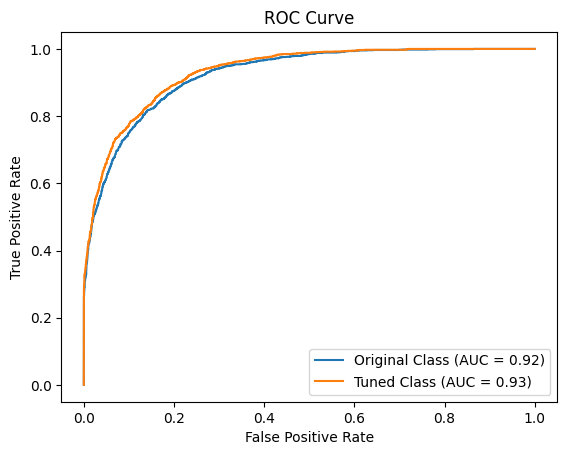

In [ ]:
n_classes = len(np.unique(y_train))

# Fit the model to the training data
classifier_tune.fit(X_train, y_train)

# Predict probabilities for each class
######
y_scores2 = classifier_tune.predict_proba(X_test)[:, 1]  

# Compute the FPR, TPR, and AUC
fpr2, tpr2, _ = roc_curve(y_test, y_scores2)
roc_auc2 = auc(fpr2, tpr2)

# Plot the ROC curve
# plt.plot(fpr, tpr, label='Original Class (AUC = %0.2f)' % roc_auc)
plt.plot(fpr2, tpr2, label='Tuned Class (AUC = %0.2f)' % roc_auc2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()